In [1]:
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import pyprojroot
import seaborn as sns


In [2]:
def cm_to_inches(cm):
    return cm / 2.54

In [3]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [4]:
SOURCE_DATA_ROOT = pyprojroot.here('results/searchstims/source_data/')

FIGURES_ROOT = pyprojroot.here('docs/paper/figures/experiment-1')

In [5]:
LEARNING_RATE = 1e-3

NET_NAMES = [
    'alexnet',
    'VGG16',
    'CORnet_S',
    'CORnet_Z',
]

STIM_TYPES = [
    'RVvGV',
    'RVvRHGV',
    '2_v_5',
]

SET_SIZES = [
    1,
    2,
    4,
    8,
]

In [6]:
df_all = []    

TODO = (
    ('3stims', 'transfer' , 'Train on natural images,\nadapt to visual search task'),
    ('3stims_CelebASpoof', 'transfer', 'Train on faces,\nadapt to visual search task'),
    ('3stims_nih_chest_xray', 'transfer', 'Train on x-ray images,\nadapt to visual search task'),
    ('3stims', 'initialize', 'Train on search task only'),
    ('10stims', 'initialize', 'Train on search task only\n(10 stimulus types)'),
    ('3stims_big_set_size', 'initialize', 'Train on search task only\n(7 set sizes)'),
)

for source_data_dir, method, label in TODO:
    df = pd.read_csv(SOURCE_DATA_ROOT / source_data_dir / f'{method}-set-size-1-error-plus-effect.csv')

    df = df[
        (df.net_name.isin(NET_NAMES)) &
        (df.stimulus.isin(STIM_TYPES)) 
    ]
    df['label'] = label
    df_all.append(df)
    
df_all = pd.concat(df_all)

In [7]:
stimulus_map = {
    'RVvGV': 'RV v. GV',
    'RVvRHGV': 'RV v. RH & GV',
    '2_v_5': '2 v. 5'
}
df_all['stimulus name'] = df_all['stimulus'].map(stimulus_map)

In [8]:
NET_NAMES_FOR_DISPLAY = {
    'alexnet': 'AlexNet',
    'VGG16': 'VGG16',
    'CORnet_S': 'CORnet S',
    'CORnet_Z': 'CORnet Z',
}

In [9]:
df_all['net_name'] = df_all.net_name.map(NET_NAMES_FOR_DISPLAY)

In [10]:
sns.set_context('paper')

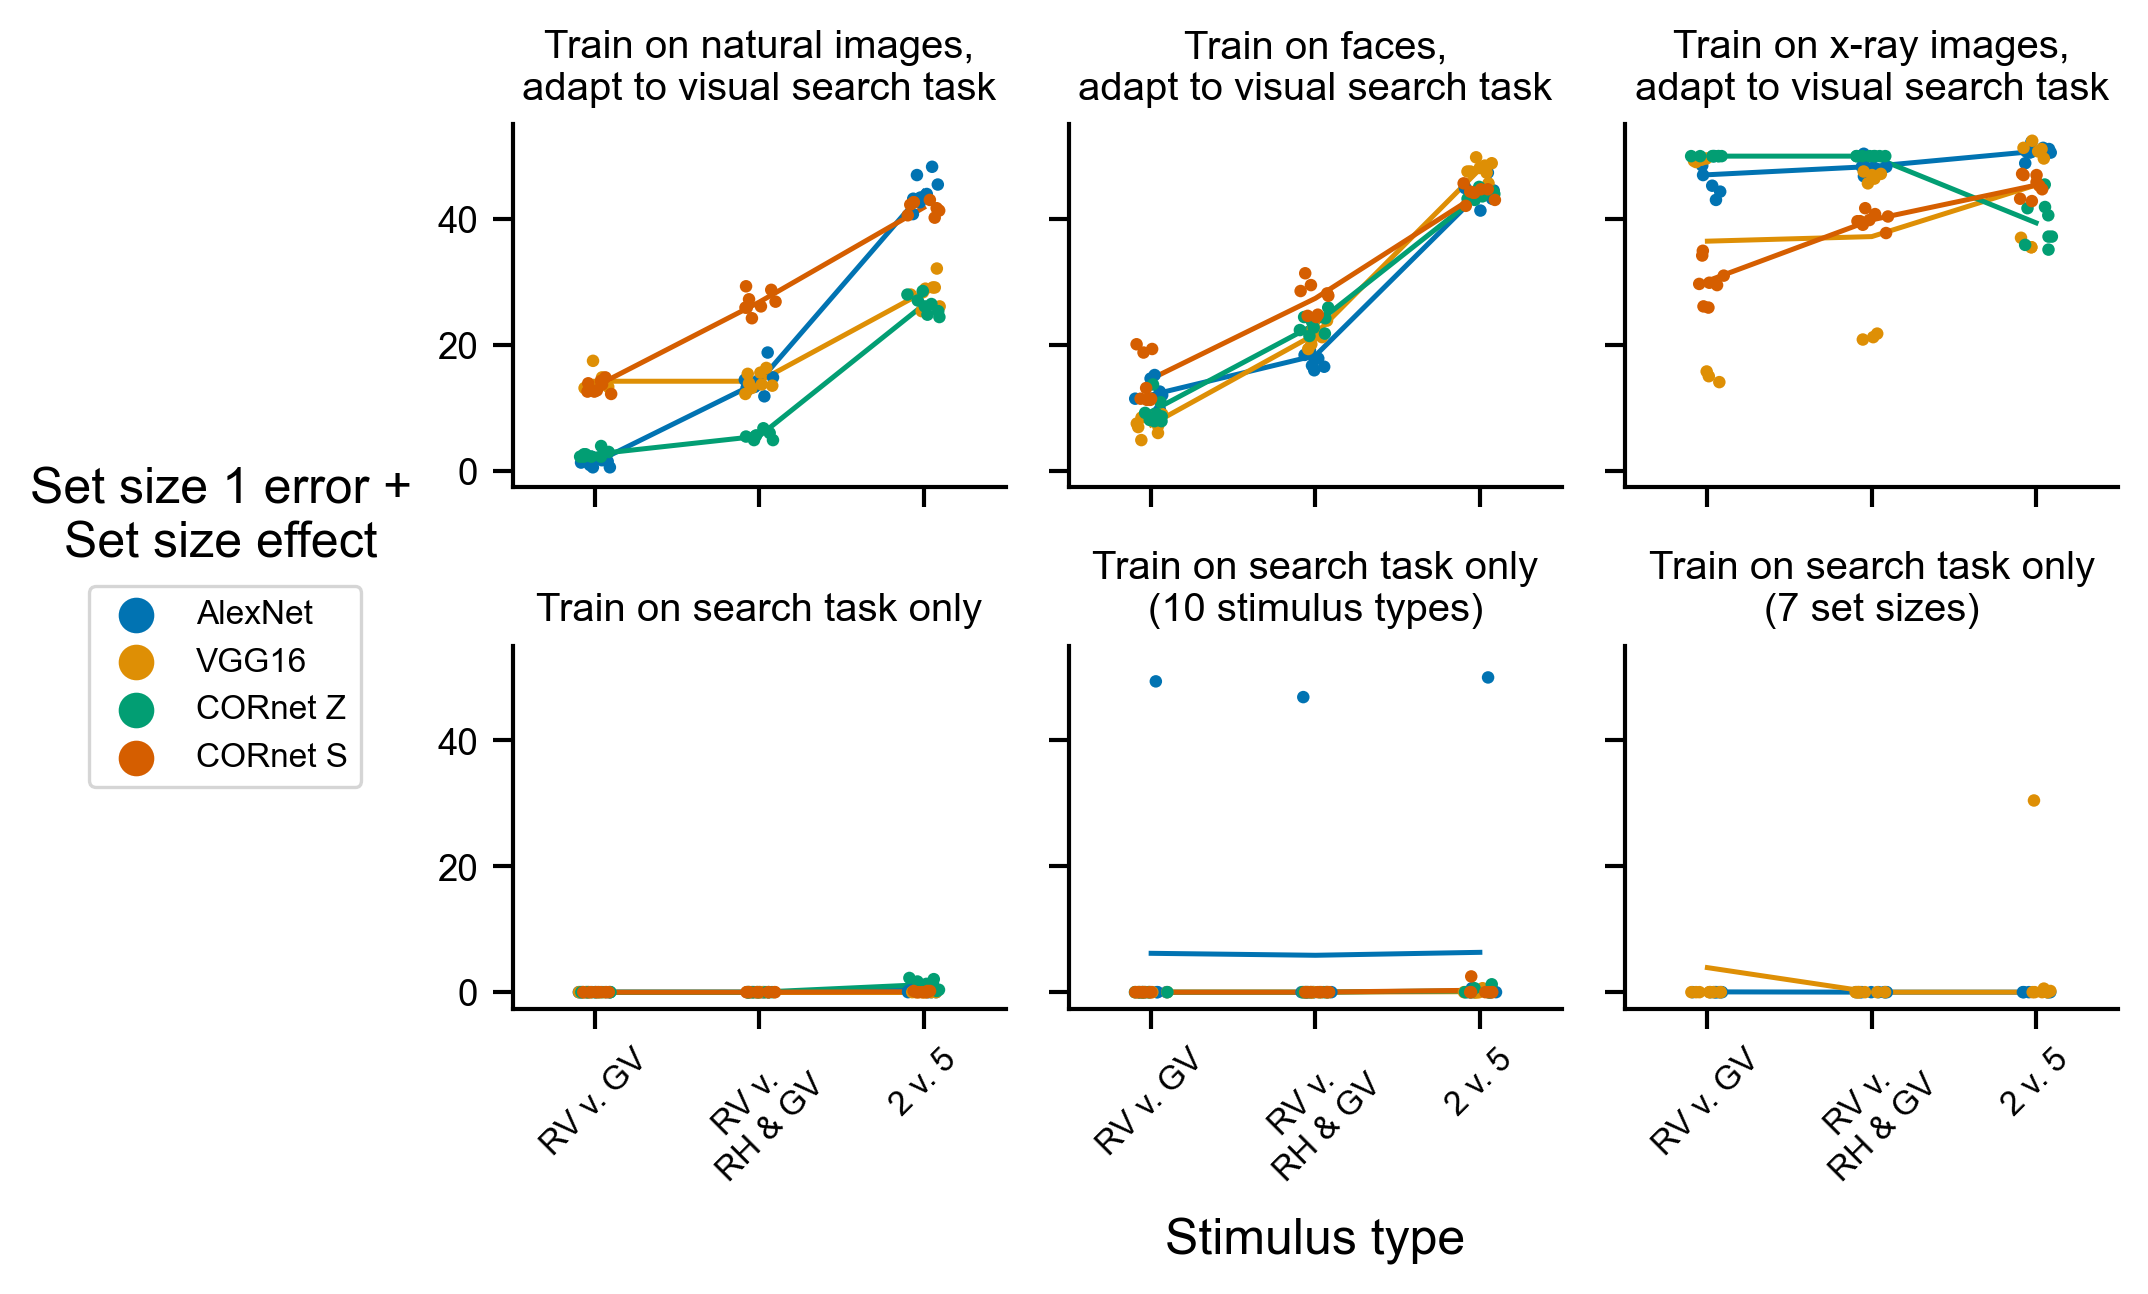

In [11]:
XTICKLABELS = [
    'RV v. GV',
    'RV v.\nRH & GV',
    '2 v. 5',
]

ORDER = [
    'RVvGV', 
    'RVvRHGV',
    '2_v_5', 
]

sns.set_palette("colorblind")

# figsize = tuple(cm_to_inches(size) for size in (7.5, 5))

fig, ax_arr = plt.subplots(
    2, 3, 
    figsize=(7.5, 5),
    dpi=300, 
    sharey=True
)
ax_arr = ax_arr.ravel()

for ax_ind, label in enumerate(df_all.label.unique()):
    df_label = df_all[df_all.label == label]
    ax = ax_arr[ax_ind]

    g = sns.lineplot(
        data=df_label,
        x='stimulus',
        y='set_size_1_err_plus_effect',
        hue='net_name',
        ci=None,
        ax = ax,
    )

    
    g = sns.stripplot(
        data=df_label,
        x='stimulus',
        y='set_size_1_err_plus_effect',
        hue='net_name',
        size=3,
        order=ORDER,
        ax = ax,
    )
    if ax_ind == 2:
        handles, labels = ax.get_legend_handles_labels()
        handles, labels = handles[4:], labels[4:]
    if ax_ind < 3:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(XTICKLABELS, rotation=45, fontsize=8)

    g.legend_.remove()
    ax.set_ylabel('')
    ax.set_xlabel('')

    sns.despine(ax=ax)
    ax.set_title(label)

# add a big axis, hide frame
big_ax = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
big_ax.set_xticks([])
big_ax.set_yticks([])
big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_ax.grid(False)


BBOX_TO_ANCHOR = (0.2, 0.6)

fig.legend(handles,
           labels, 
           bbox_to_anchor=BBOX_TO_ANCHOR,
           frameon=True,
           borderaxespad=0., 
           fontsize=8);

big_ax.set_xlabel("Stimulus type", labelpad=50, fontsize=12);
big_ax.set_ylabel('Set size 1 error +\nSet size effect', labelpad=70, fontsize=12, rotation=0);

fig.tight_layout()

for ext in ('svg', 'png'):
    fig_path = FIGURES_ROOT.joinpath(
        f'set-size-1-error-plus-effect-all-networks.{ext}'
    )
    plt.savefig(fig_path, bbox_inches="tight")